In [ ]:
#softmax 图像分类数据集
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()

: 

In [ ]:
# 通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中
# 通过ToTensor实例将图像数据从PIL(Python Image Library)类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
#transforms.ToTensor() 将原始的PILImage格式或者numpy.array格式的数据格式化为可被pytorch快速处理的张量类型
#将PIL和numpy格式的数据从[0,255]范围转换到[0,1] ，具体做法其实就是将原始数据除以255
#另外原始数据的shape是（H x W x C），通过transforms.ToTensor()后shape会变为（C x H x W）
mnist_train = torchvision.datasets.FashionMNIST(
root="../data", train=True, transform=trans, download=True)
'''
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FasionMNIST',  # 将数据保存在本地什么位置
    train=True,  # 我们希望数据用于训练集，If True, creates dataset from train-images-idx3-ubyte, 
                                            otherwise from t10k-images-idx3-ubyte
    download=True,  # 如果目录下没有文件，则自动下载
    transform=transforms.Compose([
        transforms.ToTensor()
    ])  # 我们将数据转为Tensor类型
'''
mnist_test = torchvision.datasets.FashionMNIST(   # 将测试集数据读取到内存中
root="../data", train=False, transform=trans, download=True) 

In [ ]:
'''
Fashion-MNIST由10个类别的图像组成，每个类别由训练数据集（train dataset）中的6000张图像和测试数据
集（test dataset）中的1000张图像组成。因此，训练集和测试集分别包含60000和10000张图像。测试数据集
不会⽤于训练，只⽤于评估模型性能
'''
len(mnist_train), len(mnist_test)

(60000, 10000)

In [ ]:
'''
每个输⼊图像的⾼度和宽度均为28像素。数据集由灰度图像组成，其通道数为1。为了简洁起⻅，本书将⾼
度h像素、宽度w像素图像的形状记为h × w或（h,w）,原始数据的shape是（H x W x C），
通过transforms.ToTensor()后shape会变为（C x H x W）
'''
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
#用于在数字标签索引及其文明名称之间切换
def get_fashion_mnist_labels(labels):
    #@save
    """返回Fashion-MNIST数据集的⽂本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [ ]:
#可视化样本
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale) #col 子图网格列数 row 子图网格行数
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize) 
    #创建一个图形和一组子图,返回 fig,axes
    axes = axes.flatten() #将ax由n*m的Axes组展平成1*nm的Axes组
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img): #判断 obj 是否是张量
            # 图⽚张量
            ax.imshow(img.numpy()) #使用axes.flatten()可直接用ax[i]
        else:
            # PIL图⽚
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False) #axes 轴的复数 axis 轴 
        ax.axes.get_yaxis().set_visible(False) #visible 可见
        if titles:
            ax.set_title(titles[i])
    return axes

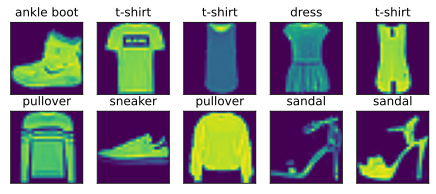

In [ ]:
#iter( object )：生成可迭代对象的迭代器
#next( iter, end_num )：每执行依次，按顺序每次从迭代器中提取一个元素
#其实next( iter(object) )就是从可迭代对象object中依次取元素，
#和直接用索引来取元素没有本质的区别。
#但是这种取法的好处就是next()会自动帮你记录已经取到第几个了！
#无论何地使用这条语句，它都会自动继续帮你往下取值！—— 即：不用多次记该取第几个索引值了。

X, y = next(iter(data.DataLoader(mnist_train, batch_size=10)))
show_images(X.reshape(10, 28, 28), 2, 5, titles=get_fashion_mnist_labels(y));
# X.reshape(C,H,W) 2行9列 灰度图片,通道数为1

In [ ]:
#读取小批量,使用内置数据迭代器,大小为batch_size
batch_size = 256
def get_dataloader_workers(): #@save
    """使⽤4个进程来读取数据"""
    return 4
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers()) #shuffle 随机打乱

In [ ]:
#查看读取训练数据所需时间
timer = d2l.Timer() #记录multiple运行时间
for X, y in train_iter: #迭代次数
    continue
f'{timer.stop():.2f} sec'  #停止计时器并将时间记录在列表中


'1.20 sec'

In [ ]:
#整合所有组件
#构建函数用于获取和读取fashion-mnist数据集,
#返回训练集和验证集的数据迭代器,可选参数resize用于将图像大小调整为另一种形式
def load_data_fashion_mnist(batch_size, resize=None): #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize)) 
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))


In [ ]:
#指定resize参数测试load__date__fashion__mnist函数的图像大小调整功能
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break
#batch_size:32 C:1 H:1 W:1 

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [ ]:
'''
小结:
• Fashion-MNIST是⼀个服装分类数据集，由10个类别的图像组成。我们将在后续章节中使⽤此数据集来
评估各种分类算法。
• 我们将⾼度h像素，宽度w像素图像的形状记为h × w或（h,w）。
• 数据迭代器是获得更⾼性能的关键组件。依靠实现良好的数据迭代器，利⽤⾼性能计算来避免减慢训
练过程。
'''